In [22]:
from py2cytoscape import cyrest
import pandas as pd

%run utils/cyto_to_shapely_node_util.ipynb
%run utils/cyto_to_shapely_edge_util.ipynb
%run utils/full_cyto_to_shapely_util.ipynb
%run utils/network_score_util.ipynb

BASE_URL = 'http://localhost:1234/v1/'
cy = cyrest.cyclient()

MIN_PARAMETER_VALUE = -230
MAX_PARAMETER_VALUE = 1630
STEP = 1

X_LIM_RANGE_MAX = 16000
Y_LIM_RANGE_MAX = 5000

In [23]:
#Set up
network_suid = str(cy.network.get_attribute(
    columnList='SUID',
    network='CURRENT'
)[0]['SUID'])
view_suid = str(requests.get(BASE_URL + 'networks/views/currentNetworkView').json()['data']['networkViewSUID'])

dataframe = pd.DataFrame()
data = []

-220
-200
-180
-160
-140
-120
-100
-80
-60
-40
-20
0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060
1080
1100
1120
1140
1160
1180
1200
1220
1240
1260
1280
1300
1320
1340
1360
1380
1400
1420
1440
1460
1480
1500
1520
1540
1560
1580
1600
1620


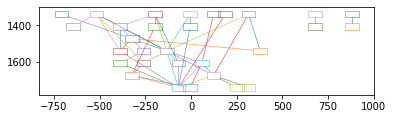

In [24]:
#Apply new layout to network and get new score
for i in range(MIN_PARAMETER_VALUE, MAX_PARAMETER_VALUE + 1, STEP):
    if i % 20 == 0:
        print(i)
    cy.layout.hierarchical(network='SUID:' + str(network_suid), rightMargin=str(i))
    new_data = network_score(
        network_suid, 
        view_suid, 
        X_LIM_RANGE_MAX,
        Y_LIM_RANGE_MAX,
        edge_direction='up'
    )
    data.append([i] + new_data)

In [25]:
dataframe = dataframe.append(data)
dataframe.columns = ['HorizontalSpacing', 
                                  'EdgeCrossings', 
                                  'NodeOverlaps',
                                  'NodeEdgeOverlaps',
                                  'EdgeLength', 
                                  'NodeDistance', 
                                  'NodeEdgeDistance', 
                                  'DownwardEdge']
dataframe.to_csv()

',HorizontalSpacing,EdgeCrossings,NodeOverlaps,NodeEdgeOverlaps,EdgeLength,NodeDistance,NodeEdgeDistance,DownwardEdge\n0,-230,0.9583718778908418,0.993103448275862,0.986322188449848,0.8683214031398425,0.014965281610185614,0.010716027767534499,0.9148936170212766\n1,-229,0.9583718778908418,0.993103448275862,0.986322188449848,0.8683214031398425,0.014965281610185614,0.010716027767534499,0.9148936170212766\n2,-228,0.9583718778908418,0.993103448275862,0.986322188449848,0.8683214031398425,0.014965281610185614,0.010716027767534499,0.9148936170212766\n3,-227,0.9583718778908418,0.993103448275862,0.986322188449848,0.8683214031398425,0.014965281610185614,0.010716027767534499,0.9148936170212766\n4,-226,0.9583718778908418,0.993103448275862,0.986322188449848,0.8683214031398425,0.014965281610185614,0.010716027767534499,0.9148936170212766\n5,-225,0.9583718778908418,0.993103448275862,0.986322188449848,0.8683214031398425,0.014965281610185614,0.010716027767534499,0.9148936170212766\n6,-224,0.95837187789084